In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
wine = pd.read_csv('winequality-red.csv')

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins=bins, labels=group_names)

In [8]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [9]:
wine.quality.unique()

[bad, good]
Categories (2, object): [bad < good]

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [11]:
label_quality = LabelEncoder()

In [12]:
wine.quality = label_quality.fit_transform(wine.quality)

In [13]:
import seaborn as sns

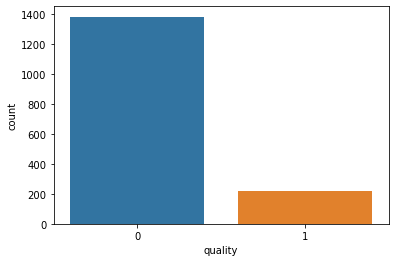

In [14]:
sns.countplot(wine.quality)

In [15]:
X = wine.drop('quality', axis=1)  # feature usate per prediction
y = wine.quality  # variabile da predire

In [17]:
# split dei dati

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=42)

Nota: X_train e y_train sono randomizzati allo stesso modo

In [18]:
# scaliamo le colonne uniformemente, in modo che le colonne 
# che hanno numeri con range più alti non "coprano" le colonne
# che hanno numeri più piccoli

sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)


In [19]:
rfc = RandomForestClassifier(n_estimators=32)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [20]:
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       273
           1       0.71      0.62      0.66        47

    accuracy                           0.91       320
   macro avg       0.82      0.79      0.80       320
weighted avg       0.90      0.91      0.90       320

[[261  12]
 [ 18  29]]


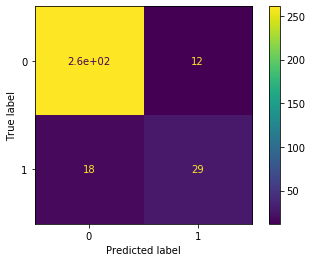

In [21]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(rfc, X_test, y_test)
plt.show()

In [22]:
from sklearn import metrics

In [27]:
print('True',y_test.values[0:25])
print('Pred',pred_rfc[0:25])

True [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0]
Pred [0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0]


In [28]:
confusion = confusion_matrix(y_test, pred_rfc)

In [29]:
print(confusion)

[[261  12]
 [ 18  29]]


In [47]:
# qui si assume che 0 = bad = Negative, 1 = good = positive
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

# TN,FP,FN,TP = confusion_matrix(y_test, pred_rfc).ravel()

### metriche: quanto è buono il classifier?
**Accuracy**

In [33]:
print((TP+TN)/float(TP+TN+FP+FN))
print(metrics.accuracy_score(y_test, pred_rfc))

0.90625
0.90625


**Classification error**

In [35]:
print((FP+FN)/float(TP+TN+FP+FN))
print(1 - metrics.accuracy_score(y_test, pred_rfc))

0.09375
0.09375


**Sensitivity (o True Positive Rate o Recall)**

In [38]:
print((TP)/float(TP+FN))
print(metrics.recall_score(y_test, pred_rfc))

0.6170212765957447
0.6170212765957447


**Specificity**

In [39]:
print((TN)/float(TN+FP))

0.9560439560439561


**False Positive Rate**

In [40]:
print((FP)/float(TN+FP))

0.04395604395604396


**Precision**

In [41]:
print(TP/float(TP+FP))
print(metrics.precision_score(y_test, pred_rfc))

0.7073170731707317
0.7073170731707317


**F1 score** (media armonica fra precision e recall)

In [51]:
precision = metrics.precision_score(y_test, pred_rfc)
recall = metrics.recall_score(y_test, pred_rfc)
f1_score = (2*precision*recall)/(precision+recall)
print(f1_score)
print(metrics.f1_score(y_test, pred_rfc))

0.6590909090909092
0.6590909090909092


## Classification Threshold

In [52]:
rfc.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [53]:
# ogni riga è un sample
# 2 colonne: proba che il sample sia 'bad' (0) e proba 
# che il sample sia 'good' (1), i.e. probability per ogni classe
rfc.predict_proba(X_test)[0:10, :]

array([[1.     , 0.     ],
       [1.     , 0.     ],
       [0.90625, 0.09375],
       [1.     , 0.     ],
       [1.     , 0.     ],
       [1.     , 0.     ],
       [1.     , 0.     ],
       [0.96875, 0.03125],
       [0.375  , 0.625  ],
       [0.9375 , 0.0625 ]])

In [54]:
# pred proba della classe 1 (good)
y_pred_prob = rfc.predict_proba(X_test)[:,1]